## **I HAVE FULLY DONE THE ASSIGNMENT, THIS IS THE LAB VERSION THAT WAS DONE IN THE LAB **

In [21]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import warnings
    from sklearn.metrics.pairwise import cosine_similarity
    from scipy.stats import pearsonr

    df = pd.read_csv("( dataset created in Assignment 1)Scraped Full Dataset .csv")
    df.iloc[:, 3:] = df.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

    tnu = len(df)
    tni = len(df.columns[3:])
    print("Total number of users (tnu):", tnu)
    print("Total number of items (tni):", tni)

    item_rating_counts = df.iloc[:, 3:].notnull().sum()
    print("\nNumber of ratings per item:")
    print(item_rating_counts)


Total number of users (tnu): 50
Total number of items (tni): 138

Number of ratings per item:
kindness     50
abilities    50
activism     50
adulthood    50
adventure    50
             ..
world        50
write        50
writers      50
writing      50
yourself     50
Length: 138, dtype: int64


In [22]:

    active_users_indices = [0, 1, 2]
    target_items = [df.columns[3], df.columns[4]]
    print("\nTarget Items:", target_items)


    for (user_idx, missing_count) in zip(active_users_indices, [2, 3, 5]):
        missing_cols = np.random.choice(df.columns[3:], missing_count, replace=False)
        df.loc[user_idx, missing_cols] = np.nan

    for col, pm in zip(target_items, [4, 10]):
        num_missing = int(len(df) * (pm / 100))
        missing_rows = np.random.choice(df.index, num_missing, replace=False)
        df.loc[missing_rows, col] = np.nan


Target Items: ['kindness', 'abilities']


In [23]:

    missing_fraction = 0.10
    ratings_data = df.iloc[:, 3:]
    total_entries = ratings_data.size
    num_additional_missing = int(total_entries * missing_fraction)

    all_indices = [(i, j) for i in range(ratings_data.shape[0]) for j in range(ratings_data.shape[1])]
    np.random.seed(42)
    chosen_indices = np.random.choice(len(all_indices), num_additional_missing, replace=False)

    for idx in chosen_indices:
        row_idx, col_idx = all_indices[idx]
        if not pd.isnull(ratings_data.iat[row_idx, col_idx]):
            ratings_data.iat[row_idx, col_idx] = np.nan

    df.iloc[:, 3:] = ratings_data

    print("\nUpdated Dataset with Additional Random Missing Values:")
    print(df.head(10))


Updated Dataset with Additional Random Missing Values:
                                               Quote             Author  \
0  “The world as we have created it is a process ...    Albert Einstein   
1  “It is our choices, Harry, that show what we t...       J.K. Rowling   
2  “There are only two ways to live your life. On...    Albert Einstein   
3  “The person, be it gentleman or lady, who has ...        Jane Austen   
4  “Imperfection is beauty, madness is genius and...     Marilyn Monroe   
5  “Try not to become a man of success. Rather be...    Albert Einstein   
6  “It is better to be hated for what you are tha...         André Gide   
7  “I have not failed. I've just found 10,000 way...   Thomas A. Edison   
8  “A woman is like a tea bag; you never know how...  Eleanor Roosevelt   
9  “A day without sunshine is like, you know, nig...       Steve Martin   

                                           Tags  kindness  abilities  \
0        change, deep-thoughts, thinking, worl

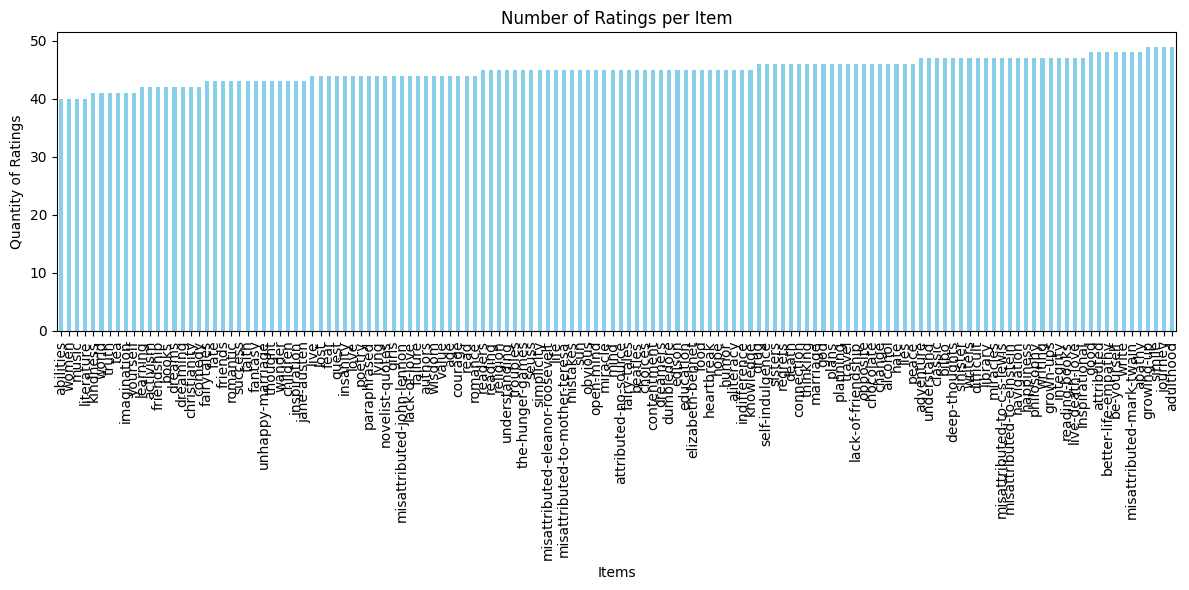

In [ ]:
plt.figure(figsize=(12,6))
item_counts.plot(kind='bar',color='skyblue')
plt.title('Number of Ratings per Item')
plt.xlabel('Items')
plt.ylabel('Quantity of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:

    ratings_data = df.iloc[:, 3:]


    min_rating = ratings_data.min().min()
    max_rating = ratings_data.max().max()

    print("\nMinimum rating:", min_rating)
    print("Maximum rating:", max_rating)

    ratings_data = (ratings_data - min_rating) / (max_rating - min_rating) * 4 + 1

    ratings_data = ratings_data.clip(lower=1, upper=5)

    df.iloc[:, 3:] = ratings_data

    print("\nNormalized Dataset (1-to-5 scale):")
    print(df.head(10))



Minimum rating: 1.0
Maximum rating: 5.0

Normalized Dataset (1-to-5 scale):
                                               Quote             Author  \
0  “The world as we have created it is a process ...    Albert Einstein   
1  “It is our choices, Harry, that show what we t...       J.K. Rowling   
2  “There are only two ways to live your life. On...    Albert Einstein   
3  “The person, be it gentleman or lady, who has ...        Jane Austen   
4  “Imperfection is beauty, madness is genius and...     Marilyn Monroe   
5  “Try not to become a man of success. Rather be...    Albert Einstein   
6  “It is better to be hated for what you are tha...         André Gide   
7  “I have not failed. I've just found 10,000 way...   Thomas A. Edison   
8  “A woman is like a tea bag; you never know how...  Eleanor Roosevelt   
9  “A day without sunshine is like, you know, nig...       Steve Martin   

                                           Tags  kindness  abilities  \
0        change, deep-tho

In [25]:

    df.to_csv("modified_dataset.csv", index=False)
    print("\nModified dataset saved to 'modified_dataset.csv'.")

    df_modified = pd.read_csv("modified_dataset.csv")
    ratings_matrix = df_modified.iloc[:, 3:]



Modified dataset saved to 'modified_dataset.csv'.


In [26]:

    co_rating_data = []
    for user_idx in active_users_indices:
        print(f"\nProcessing Active User (Index: {user_idx})")
        user_row = ratings_matrix.iloc[user_idx]
        rated_items = user_row.dropna().index
        co_rated = ratings_matrix.loc[:, rated_items].dropna(how='all')
        num_common_users = co_rated.shape[0] - 1
        num_coRated_items = co_rated.count().sum()
        co_rating_data.append((num_common_users, num_coRated_items))
        print(f"Number of common users: {num_common_users}, Co-rated items: {num_coRated_items}")

    co_rating_array = np.array(sorted(co_rating_data, key=lambda x: x[0], reverse=True))
    print("\nCo-Rating Analysis (2D Array):")
    print(co_rating_array)



Processing Active User (Index: 0)
Number of common users: 49, Co-rated items: 5354

Processing Active User (Index: 1)
Number of common users: 49, Co-rated items: 5486

Processing Active User (Index: 2)
Number of common users: 49, Co-rated items: 5547

Co-Rating Analysis (2D Array):
[[  49 5354]
 [  49 5486]
 [  49 5547]]


In [27]:

    thresholds = []
    for user_idx in active_users_indices:
        user_rated_count = ratings_matrix.iloc[user_idx].notnull().sum()
        user_coRated_items_list = [ci for (_, ci) in co_rating_data]
        beta = sum([1 for c_items in user_coRated_items_list if c_items >= 0.3 * user_rated_count])
        thresholds.append(beta)

    print("\nThresholds (β) for Active Users:")
    for i, beta in enumerate(thresholds):
        print(f"User {active_users_indices[i]}: {beta}")



Thresholds (β) for Active Users:
User 0: 3
User 1: 3
User 2: 3


In [28]:
    def mean_center_user_matrix(ratings):
        """Mean-center user-based ratings by subtracting each user's mean rating."""
        user_means = ratings.mean(axis=1)
        centered = ratings.sub(user_means, axis=0).fillna(0)
        return centered, user_means

In [29]:
 def pcc_similarity_user_based(centered_matrix):
        """Compute user-user PCC similarity from mean-centered data."""
        n_users = centered_matrix.shape[0]
        sim = np.zeros((n_users, n_users))
        vals = centered_matrix.values
        for i in range(n_users):
            for j in range(i+1, n_users):
                user_i = vals[i]
                user_j = vals[j]
                mask = (user_i != 0) & (user_j != 0)
                corr = pearsonr(user_i[mask], user_j[mask])[0] if np.sum(mask) > 1 else 0
                sim[i, j] = corr
                sim[j, i] = corr
        return pd.DataFrame(sim, index=centered_matrix.index, columns=centered_matrix.index)

In [30]:
def apply_discount_factor_user(sim_df, ratings, user_idx, thresholds, active_users_indices):
        """Apply user-based discount factor (DF) to similarities."""
        user_threshold = thresholds[active_users_indices.index(user_idx)]
        active_user_ratings = ratings.iloc[user_idx]
        active_mask = active_user_ratings.notnull()

        discounted_sim = sim_df[user_idx].copy()
        for neighbor_idx in ratings.index:
            if neighbor_idx == user_idx:
                discounted_sim.loc[neighbor_idx] = 0
                continue
            neighbor_ratings = ratings.iloc[neighbor_idx]
            co_rated_mask = active_mask & neighbor_ratings.notnull()
            co_rated_count = co_rated_mask.sum()
            DF = min(1, co_rated_count / user_threshold) if user_threshold > 0 else 1
            discounted_sim.loc[neighbor_idx] = sim_df.loc[neighbor_idx, user_idx] * DF
        return discounted_sim


In [31]:
def predict_missing_user_based(ratings, similarity_series, top_fraction=0.2):
        """Predict missing ratings for an active user using user-based approach."""
        n_users = len(ratings)
        top_n = int(top_fraction * n_users)
        top_neighbors = similarity_series.sort_values(ascending=False).head(top_n).index
        active_user_idx = similarity_series.name
        missing_items = ratings.iloc[active_user_idx][ratings.iloc[active_user_idx].isnull()].index

        predictions = {}
        for item in missing_items:
            numerator, denominator = 0, 0
            for nbr in top_neighbors:
                sim = similarity_series.loc[nbr]
                nbr_rating = ratings.loc[nbr, item]
                if not np.isnan(nbr_rating):
                    numerator += sim * nbr_rating
                    denominator += abs(sim)
            predictions[item] = numerator / denominator if denominator > 0 else np.nan
        return predictions

In [32]:
 def mean_center_item_matrix(ratings):
        """Mean-center item-based ratings by subtracting each item's mean rating."""
        item_means = ratings.mean(axis=0)
        centered = ratings - item_means
        centered = centered.fillna(0)
        return centered.T, item_means

In [33]:
    def pcc_similarity_item_based(centered_item_matrix):
        """Compute item-item PCC similarity from mean-centered data."""
        n_items = centered_item_matrix.shape[0]
        sim = np.zeros((n_items, n_items))
        vals = centered_item_matrix.values
        for i in range(n_items):
            for j in range(i+1, n_items):
                i_vals = vals[i]
                j_vals = vals[j]
                mask = (i_vals != 0) & (j_vals != 0)
                corr = pearsonr(i_vals[mask], j_vals[mask])[0] if np.sum(mask) > 1 else 0
                sim[i, j] = corr
                sim[j, i] = corr
        return pd.DataFrame(sim, index=centered_item_matrix.index, columns=centered_item_matrix.index)

In [34]:
    def predict_missing_item_based(ratings, item_similarity_df, target_items, fraction=0.2):
        """Predict missing ratings for target items using item-based approach."""
        n_items = len(item_similarity_df.index)
        top_n = int(fraction * n_items)
        item_preds = {}
        for item in target_items:
            similar_items = item_similarity_df[item].sort_values(ascending=False).iloc[1:top_n+1]
            for user_idx in ratings.index:
                if np.isnan(ratings.loc[user_idx, item]):
                    numerator, denominator = 0, 0
                    for sim_item, sim_score in similar_items.items():
                        usr_rating = ratings.loc[user_idx, sim_item]
                        if not np.isnan(usr_rating):
                            numerator += sim_score * usr_rating
                            denominator += abs(sim_score)
                    if user_idx not in item_preds:
                        item_preds[user_idx] = {}
                    item_preds[user_idx][item] = numerator / denominator if denominator > 0 else np.nan
        return item_preds

In [35]:
    def apply_discount_factor_item(sim_df, ratings, target_item, beta):
        """Apply item-based discount factor (DF) to similarities."""
        discounted_sim = sim_df[target_item].copy()
        target_item_ratings = ratings[target_item]
        target_item_mask = target_item_ratings.notnull()

        for other_item in sim_df.index:
            if other_item == target_item:
                discounted_sim.loc[other_item] = 0
                continue
            other_ratings = ratings[other_item]
            co_rated_mask = target_item_mask & other_ratings.notnull()
            co_rated_users_count = co_rated_mask.sum()
            DF = min(1, co_rated_users_count / beta) if beta > 0 else 1
            discounted_sim.loc[other_item] = sim_df.loc[other_item, target_item] * DF
        return discounted_sim


In [36]:
 def compute_item_threshold(ratings, target_item):
        """Compute β for items similarly to user-based threshold logic."""
        target_item_ratings = ratings[target_item]
        target_item_mask = target_item_ratings.notnull()
        users_who_rated_target = target_item_mask.sum()
        count_30 = 0.3 * users_who_rated_target

        co_rated_counts = []
        for other_item in ratings.columns:
            if other_item == target_item:
                continue
            other_mask = ratings[other_item].notnull()
            co_rated_users_count = (target_item_mask & other_mask).sum()
            co_rated_counts.append(co_rated_users_count)

        beta_item = sum([1 for c in co_rated_counts if c >= count_30])
        return beta_item

In [37]:
    filled_ratings_matrix = ratings_matrix.fillna(0)
    cosine_no_bias_array = cosine_similarity(filled_ratings_matrix)
    cosine_no_bias_df = pd.DataFrame(cosine_no_bias_array, index=ratings_matrix.index, columns=ratings_matrix.index)

    centered_user_matrix, user_means = mean_center_user_matrix(ratings_matrix)
    cosine_centered_array = cosine_similarity(centered_user_matrix)
    cosine_centered_df = pd.DataFrame(cosine_centered_array, index=ratings_matrix.index, columns=ratings_matrix.index)

    pcc_user_sim_df = pcc_similarity_user_based(centered_user_matrix)


In [38]:
    user_based_df_predictions_1_1 = {}
    for user_idx in active_users_indices:
        discounted_sim = apply_discount_factor_user(cosine_no_bias_df, ratings_matrix, user_idx, thresholds, active_users_indices)
        discounted_sim.name = user_idx
        user_based_df_predictions_1_1[user_idx] = predict_missing_user_based(ratings_matrix, discounted_sim)

    print("\nUser-Based Predictions (Cosine No Bias + DF) [Case 1.1]:")
    for u, preds in user_based_df_predictions_1_1.items():
        print(f"User {u}: {preds}")



User-Based Predictions (Cosine No Bias + DF) [Case 1.1]:
User 0: {'change': 2.9814663314993637, 'chocolate': 3.5114100934834096, 'comedy': 2.3791829762044943, 'dreaming': 3.3041163528717266, 'elizabeth-bennet': 3.2289405204291772, 'faith': 2.78610033286634, 'good': 3.10049242002522, 'inspiration': 2.7929271201491543, 'literature': 3.2215920445613118, 'marriage': 2.4555225833965957, 'mind': 2.893797423460265, 'misattributed-to-mother-teresa': 2.6633512083742255, 'obvious': 3.445761514760629, 'opposite': 2.693666566872162, 'paraphrased': 1.7103136106357253, 'philosophy': 2.486964970020715, 'poetry': 3.263050678207701, 'success': 2.7416465674696293, 'women': 2.4434125176533796}
User 1: {'children': 2.3262116307337792, 'dreamers': 2.367885034782186, 'dreaming': 3.130775262830566, 'fairy-tales': 3.425916398585936, 'faith': 2.2157032659943723, 'insanity': 2.3040663772042578, 'inspiration': 2.9793509352183887, 'library': 2.39796272763971, 'marriage': 2.2154491234037197, 'novelist-quotes': 2.

In [39]:
    user_based_df_predictions_1_2 = {}
    for user_idx in active_users_indices:
        discounted_sim = apply_discount_factor_user(cosine_centered_df, ratings_matrix, user_idx, thresholds, active_users_indices)
        discounted_sim.name = user_idx
        user_based_df_predictions_1_2[user_idx] = predict_missing_user_based(ratings_matrix, discounted_sim)

    print("\nUser-Based Predictions (Cosine + Mean-Centering + DF) [Case 1.2]:")
    for u, preds in user_based_df_predictions_1_2.items():
        print(f"User {u}: {preds}")


User-Based Predictions (Cosine + Mean-Centering + DF) [Case 1.2]:
User 0: {'change': 3.1428169027247503, 'chocolate': 3.6979270035627176, 'comedy': 2.579555586061897, 'dreaming': 3.921530908975591, 'elizabeth-bennet': 3.7646492780182728, 'faith': 3.4862950746903283, 'good': 2.964076145647252, 'inspiration': 2.4486929978843675, 'literature': 2.9995139953012715, 'marriage': 2.7902472335944264, 'mind': 2.3636455762594784, 'misattributed-to-mother-teresa': 4.260857837154155, 'obvious': 3.747068834210141, 'opposite': 3.7732574496990323, 'paraphrased': 2.070902150396712, 'philosophy': 2.6815709731258712, 'poetry': 2.9348765496838385, 'success': 3.6256251635333663, 'women': 2.7505914761562615}
User 1: {'children': 2.3558201058228154, 'dreamers': 2.4980822826783418, 'dreaming': 3.1067372850525126, 'fairy-tales': 2.8339726251750674, 'faith': 1.6777364920954698, 'insanity': 3.158627907709792, 'inspiration': 2.230384001111974, 'library': 2.502009437475018, 'marriage': 2.5408197702119124, 'noveli

In [40]:

    # No DF:
    pcc_no_df_preds = {}
    for user_idx in active_users_indices:
        sim_series = pcc_user_sim_df[user_idx]
        sim_series.name = user_idx
        pcc_no_df_preds[user_idx] = predict_missing_user_based(ratings_matrix, sim_series)

    # With DF:
    pcc_with_df_preds = {}
    for user_idx in active_users_indices:
        discounted_sim = apply_discount_factor_user(pcc_user_sim_df, ratings_matrix, user_idx, thresholds, active_users_indices)
        discounted_sim.name = user_idx
        pcc_with_df_preds[user_idx] = predict_missing_user_based(ratings_matrix, discounted_sim)

    print("\nUser-Based Predictions (PCC + Mean-Centering, No DF) [Case 1.3]:")
    for u, preds in pcc_no_df_preds.items():
        print(f"User {u}: {preds}")

    print("\nUser-Based Predictions (PCC + Mean-Centering + DF) [Case 1.3]:")
    for u, preds in pcc_with_df_preds.items():
        print(f"User {u}: {preds}")





User-Based Predictions (PCC + Mean-Centering, No DF) [Case 1.3]:
User 0: {'change': 3.1694954719326884, 'chocolate': 3.674548666412152, 'comedy': 2.563425044856178, 'dreaming': 3.9189653679771004, 'elizabeth-bennet': 3.7714656845971946, 'faith': 3.508915670243827, 'good': 2.9637401005511532, 'inspiration': 2.4612674754977975, 'literature': 2.980234815435208, 'marriage': 2.789619427835583, 'mind': 2.3622156759171835, 'misattributed-to-mother-teresa': 4.262672045322617, 'obvious': 3.7323727073604434, 'opposite': 3.794432870721007, 'paraphrased': 2.0733386830446823, 'philosophy': 2.707902676117119, 'poetry': 2.931259765579195, 'success': 3.6549364288981963, 'women': 2.7245249357695416}
User 1: {'children': 2.343935746445221, 'dreamers': 2.482060219691385, 'dreaming': 3.1130218876965405, 'fairy-tales': 2.8128845167211827, 'faith': 1.6785939420650744, 'insanity': 3.165966012752612, 'inspiration': 2.21468605917818, 'library': 2.48640882811, 'marriage': 2.54001511116138, 'novelist-quotes': 3

In [41]:

    item_filled = ratings_matrix.fillna(0).T
    cosine_no_bias_item_array = cosine_similarity(item_filled)
    cosine_no_bias_item_df = pd.DataFrame(cosine_no_bias_item_array, index=ratings_matrix.columns, columns=ratings_matrix.columns)

    centered_item_matrix, item_means = mean_center_item_matrix(ratings_matrix)
    cosine_centered_item_array = cosine_similarity(centered_item_matrix)
    cosine_centered_item_df = pd.DataFrame(cosine_centered_item_array, index=centered_item_matrix.index, columns=centered_item_matrix.index)

    pcc_item_sim_df = pcc_similarity_item_based(centered_item_matrix)




In [42]:
    item_based_df_predictions_2_1 = {}
    for item in target_items:
        beta_item = compute_item_threshold(ratings_matrix, item)
        discounted_sim_item = apply_discount_factor_item(cosine_no_bias_item_df, ratings_matrix, item, beta_item)
        discounted_sim_item.name = item
        n_items = len(cosine_no_bias_item_df.index)
        top_25 = int(0.25 * n_items)
        sorted_sim = discounted_sim_item.sort_values(ascending=False)

        item_based_df_predictions_2_1_part = {}
        for user_idx in ratings_matrix.index:
            if np.isnan(ratings_matrix.loc[user_idx, item]):
                numerator, denominator = 0, 0
                for sim_item, sim_score in sorted_sim.iloc[1:top_25+1].items():
                    usr_rating = ratings_matrix.loc[user_idx, sim_item]
                    if not np.isnan(usr_rating):
                        numerator += sim_score * usr_rating
                        denominator += abs(sim_score)
                if user_idx not in item_based_df_predictions_2_1_part:
                    item_based_df_predictions_2_1_part[user_idx] = {}
                item_based_df_predictions_2_1_part[user_idx][item] = numerator / denominator if denominator > 0 else np.nan
        item_based_df_predictions_2_1[item] = item_based_df_predictions_2_1_part

    print("\nItem-Based Predictions (Cosine No Bias + DF) [Case 2.1]:")
    for item in target_items:
        print(f"Item {item}:")
        for user, preds in item_based_df_predictions_2_1[item].items():
            print(f"User {user}: {preds}")




Item-Based Predictions (Cosine No Bias + DF) [Case 2.1]:
Item kindness:
User 6: {'kindness': 3.1224883928534033}
User 9: {'kindness': 2.7946097992963983}
User 12: {'kindness': 2.8550775626456235}
User 16: {'kindness': 2.783759248567275}
User 18: {'kindness': 2.2819155251063044}
User 27: {'kindness': 2.619720449277678}
User 34: {'kindness': 3.486799203556709}
User 42: {'kindness': 3.188988991967906}
User 49: {'kindness': 2.8610404817337223}
Item abilities:
User 13: {'abilities': 2.6131295346732135}
User 15: {'abilities': 3.0143611272863846}
User 17: {'abilities': 2.461655957608125}
User 21: {'abilities': 3.029793585983101}
User 27: {'abilities': 2.5190737118711346}
User 38: {'abilities': 2.5442283319030827}
User 43: {'abilities': 3.0914033196832627}
User 45: {'abilities': 2.3152266429912496}
User 48: {'abilities': 2.670552491308683}
User 49: {'abilities': 2.617727239273461}


In [43]:

    top_20 = int(0.2 * len(cosine_centered_item_df.index))
    item_based_centered_preds_2_2 = predict_missing_item_based(ratings_matrix, cosine_centered_item_df, target_items, fraction=0.2)
    print("\nItem-Based Predictions (Cosine + Mean-Centering, No DF) [Case 2.2]:")
    for u, preds in item_based_centered_preds_2_2.items():
        print(f"User {u}: {preds}")


Item-Based Predictions (Cosine + Mean-Centering, No DF) [Case 2.2]:
User 6: {'kindness': 3.3339196122828048}
User 9: {'kindness': 2.9199139414411506}
User 12: {'kindness': 3.115701214087032}
User 16: {'kindness': 3.1549391099460378}
User 18: {'kindness': 2.9555182902557315}
User 27: {'kindness': 3.599685988448508, 'abilities': 2.8468978500826836}
User 34: {'kindness': 3.0196859251688033}
User 42: {'kindness': 3.721910228094459}
User 49: {'kindness': 3.5023939195197014, 'abilities': 2.951399481717986}
User 13: {'abilities': 3.008035311083171}
User 15: {'abilities': 3.0489584678114445}
User 17: {'abilities': 2.706259860861024}
User 21: {'abilities': 3.2106508550925668}
User 38: {'abilities': 2.8054475474555303}
User 43: {'abilities': 2.8646486674556573}
User 45: {'abilities': 3.059712904976919}
User 48: {'abilities': 2.997576273685878}
